<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>  </center></font></h1>
<h2><font color='0B5345'> <center>Practica 5: An√°lisis frecuencial de se√±ales </center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Catalina Guerra - Juan Esteban Campillo - Angie Tovar</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>


##**Representaci√≥n de se√±ales**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fft
from scipy.signal import find_peaks
from scipy.io import loadmat
from scipy.signal import welch, butter, filtfilt
from scipy.fft import ifft

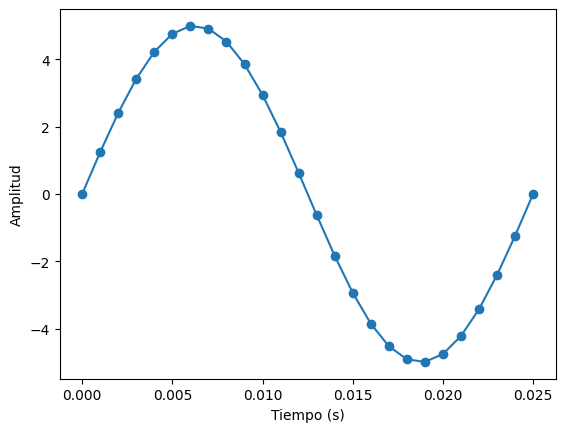

In [ ]:
Fo = 40 # Frecuencia fundamental de la se√±al
Tp = 1/Fo # Periodo de la se√±al
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la se√±al con duraci√≥n de Tp m√°s una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


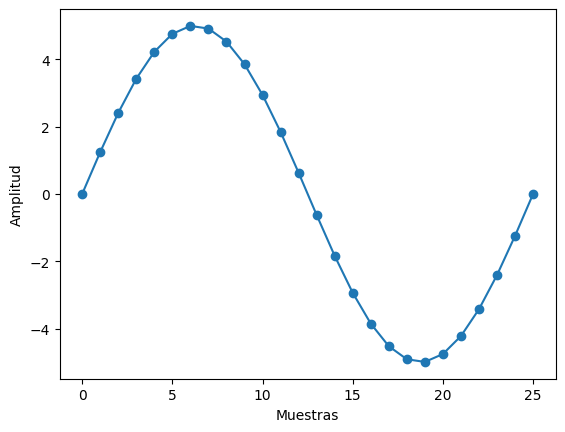

In [ ]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [ ]:
x == x1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False])

*a) Compruebe que los valores de las primeras cinco muestras son los mismos*

**R/** Se comprueba qeu los primeros 5 valores de la se√±al en el tiempo y en muestras son los mismos, termina siendo lo mismo porque Fo* t = fo * n, ya que las muestras corresponden al mismo vector de tiempo pero amplificado.

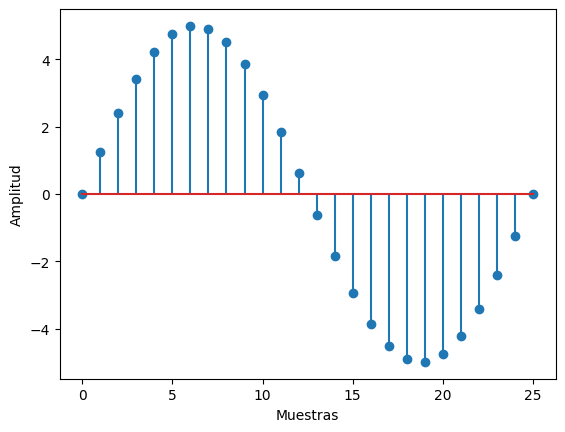

In [ ]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


##**Energia y potencia en el dominio del tiempo**

In [ ]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)


In [ ]:
print(potencia), print(potencia10)

12.500000000000002
12.500000000000005


(None, None)

*b) La potencia es la misma que en ùë•(ùëõ). ¬øPor qu√©?*

**R/** Como se observa en la celda anterior, a potencia media de la se√±al no cambia cuando se analiza varios ciclos de la sinusoide, ya que esta es una medida normalizada que considera tanto la energ√≠a total de la se√±al como la duraci√≥n durante la cual esa energ√≠a se distribuye.

##**Aplicaci√≥n**

**1**  *Cree una se√±al que sea la suma de tres componentes sinusoidales con frecuencias de 40,80 y 160 Hz. Defina la frecuencia de muestreo m√≠nima necesaria para representar la se√±al,y utilice la frecuencia de muestreo necesaria para representarla apropiadamente*

**Frecuencia de muestreo minima:**  Seg√∫n la teoria la frecuencia minima de muestreo es [1]:

       fs >= 2 * fmax

En este caso la frecuencia max es 160Hz por lo tanto

      fs >= 2 * 160 Hz = 320 Hz

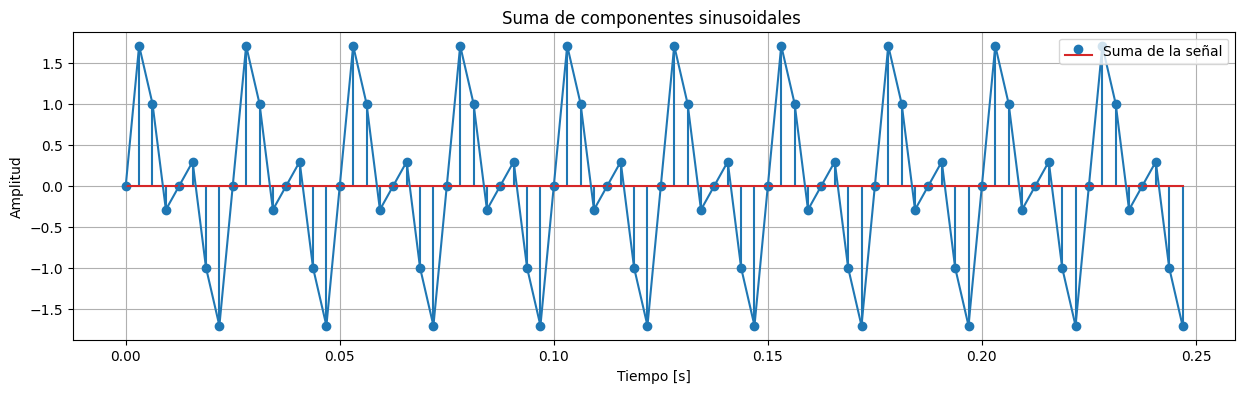

In [ ]:
Fo = 40
Fo1 = 80
Fo2 = 160
Fs = 320
T = 1 / Fs
t = np.arange(0, 0.025*10, T)

x = np.sin(2 * np.pi * Fo * t)
x1 = np.sin(2 * np.pi * Fo1 * t)
x2 = np.sin(2 * np.pi * Fo2 * t)

suma = x + x1 + x2

plt.figure(figsize=(15, 4))
plt.stem(t, suma, label='Suma de la se√±al')
plt.plot(t, suma)
plt.title('Suma de componentes sinusoidales ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


**2.** *Calcule la transformada de Fourier de la se√±al y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la se√±al (trabaje con 10 periodos de la se√±al)*

Frecuencias que componen la se√±al: [ 40.  80. 240. 280.]


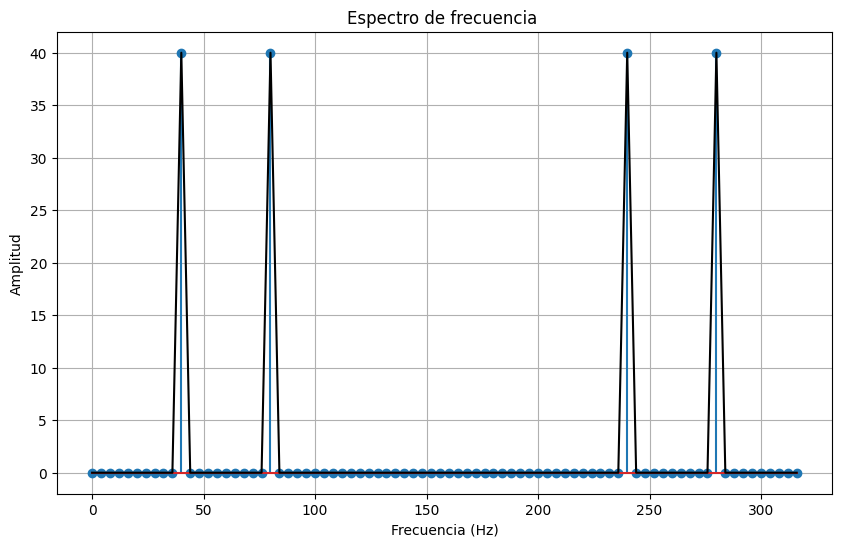

In [ ]:
transformada_suma = fft.fft(suma)

N = len(transformada_suma)
F = np.arange(0,N)*Fs/N

amplitudes = np.abs(transformada_suma)

amplitud = 40
tolerancia = 0.5
indices_cercanos = np.where((amplitudes >= amplitud - tolerancia) & (amplitudes <= amplitud + tolerancia))
frecuencias_cercanas = F[indices_cercanos]
print("Frecuencias que componen la se√±al:", frecuencias_cercanas)



plt.figure(figsize=(10, 6))
plt.stem(F,abs(transformada_suma))
plt.plot(F,abs(transformada_suma),'black')
plt.title('Espectro de frecuencia ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


**3.** *Consulte la funci√≥n que permite realizar el c√°lculo de la transformada inversa de Fourier. Apl√≠quelo a la se√±al anterior*

**Transformada inversa de Fourier**  se encuentra con la funci√≥n de numpy np.fft.ifft(), que devuelve al dominio del tiempo [2].

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


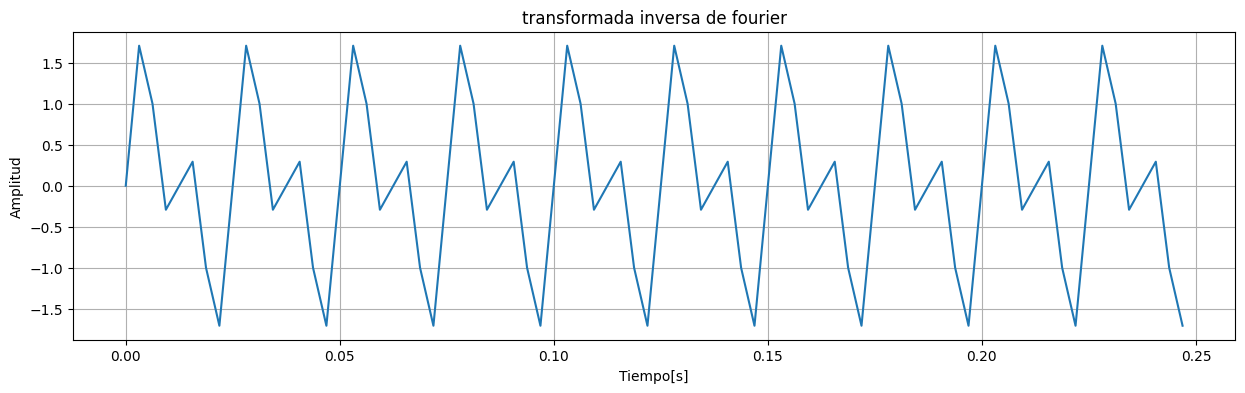

In [ ]:
se√±al_inversa= np.fft.ifft(transformada_suma)
plt.figure(figsize=(15,4))
plt.plot(t,se√±al_inversa)
plt.title('transformada inversa de fourier')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid(True)


**4.**  *¬øPodr√≠a decir que las siguientes l√≠neas aplican un filtro?¬øPor qu√©?
Extraiga de manera similar cada una de las componentes de la se√±al*

In [ ]:
F1 = np.fft.fft(x); # Se c√°lcula la transformada de Fourier y se guarda en F1
F2 = np.zeros((len(F1))); # Se crea un arreglo de ceros, del tama√±o de la transformada previamente c√°lculada(F1) y se guarda en F2
F2[9:13] = F1[9:13]; # Se copian los valores de F1 de los indices del 9-12 en F2
xr = np.fft.ifft(F2); # Se c√°lcula la transformada inversa de Fourier y se guarda en Xr
fig = plt.figure() # Se crea una figura para graficar
ax = fig.add_subplot(111) # Se agrega un √∫nico gr√°fico a la figura
ax.plot(t, np.real(xr)) # Se grafica el tiempo vs la parte real de la transformada inversa de Fourier
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)'); # Se ponen las etiquetas de los ejes para la gr√°fica

#Introducci√≥n al an√°lisis frecuencial de se√±ales Biose√±ales y sistemas
plt.show()

**/R** Las lineas si aplican un filtro, ya que, primero, se calcula la transformada de Fourier de la se√±al original, lo que permite obtener sus componentes de frecuencia. luego, se crea un nuevo arreglo de ceros endonde  solo se copian ciertos componentes de frecuencia de la transformada, manteniendo √∫nicamente los √≠ndices del 9 al 12 y eliminando el resto. Finalmente, se aplica la transformada inversa de Fourier para reconstruir la se√±al en el dominio del tiempo utilizando solo las frecuencias seleccionadas. Por lo tanto puede considerarse como un filtro ya que permite que solo ciertas frecuencias pasen.

<ipython-input-18-bd52db6356ca>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[38:42] = F1[38:42];


70.0


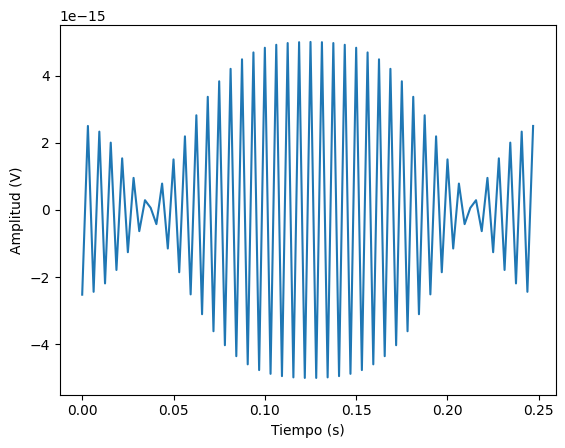

In [ ]:
F1 = np.fft.fft(suma);
F2 = np.zeros((len(F1)));
F2[38:42] = F1[38:42];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');

k= (280*len(x))/320
print(k)


**5.** *El archivo adjunto (senecg.mat) contiene una se√±al de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un an√°lisis en frecuencia de la se√±al usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elim√≠nelo de la forma que se mostr√≥ antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la se√±al filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)*

In [ ]:
mat_data = loadmat('senecg.mat')
signal_ecg = mat_data['ECG'].flatten()

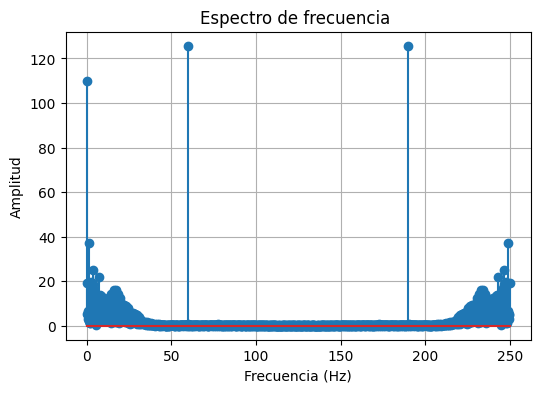

In [ ]:
transformada_suma = fft.fft(signal_ecg)
Fs= 250
N = len(transformada_suma)
F = np.arange(0,N)*Fs/N

amplitudes = np.abs(transformada_suma)
plt.figure(figsize=(6, 4))
plt.stem(F,abs(transformada_suma))
#plt.plot(F,abs(transformada_suma),'r--')
plt.title('Espectro de frecuencia ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Esta gr√°fica nos permite evidenciar el rango de frecuencias en la que se encuentra la se√±al de inter√©s. Se encuentra en un intervalo de frecuencias entre 0 y 40 Hz.

**Ancho de ventana:** Las ventanas  grandes Ofrecen mejor resoluci√≥n en frecuencia, pero peor resoluci√≥n temporal , mientras que las ventanas m√°s peque√±as mejoran la resoluci√≥n temporal a costa de la resoluci√≥n en frecuencia. Como se tiene 1250 datos y una frecuencia de muestreo baja,se escoje una ventana de 500 datos, que cubre 2 segundos de se√±al, lo cual es razonable para el an√°lisis de se√±ales ECG, ya que nos permite ver varios ciclos del complejo PQRS (dura entre 0,07 y 0,10 segundos.)[3] .  

**Solapamiento:** Se toma un solapamiento del 50%,ya que este permite que el centro del siguiente segmento de datos se alinee con el final del segmento anterior, justo donde la ventana de Hanning tiene un valor m√≠nimo. Lo que significa que el punto donde un segmento anterior tiene muy poca contribuci√≥n a la se√±al es exactamente el punto donde el siguiente segmento tiene su m√°xima contribuci√≥n. Esto permite que se pierda la menor informaci√≥n posible de los datos [4].

Text(0.5, 1.0, 'Periodograma de Welch - Se√±al original')

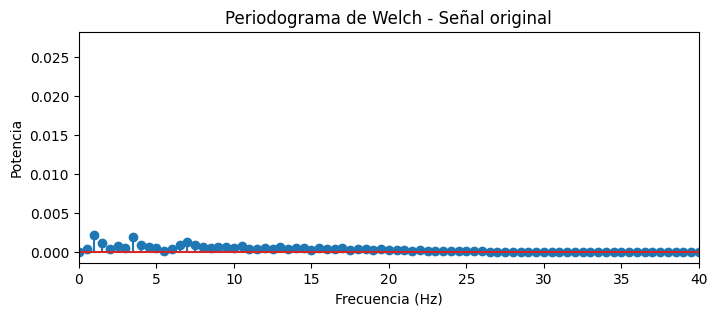

In [ ]:
fs = 250
ancho_ventana = 500
solapamiento = int(ancho_ventana / 2)
window = np.hanning(ancho_ventana)


# periodograma de Welch (se√±al original)
f, Pxx = welch(signal_ecg, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8,3))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 40])
plt.title('Periodograma de Welch - Se√±al original')



Como se puede observar en el periodograma de Welch, la se√±al tiene muy poca energ√≠a en las frecuencias mostradas. Por esto, se decide aplicar un filtro pasabanda para concentrar la energ√≠a en las frecuencias relevantes, que como se mostr√≥ anteriormente, van de 0 a 40 Hz.

<ipython-input-30-f3c387fafcae>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[0:40] = F1[0:40];


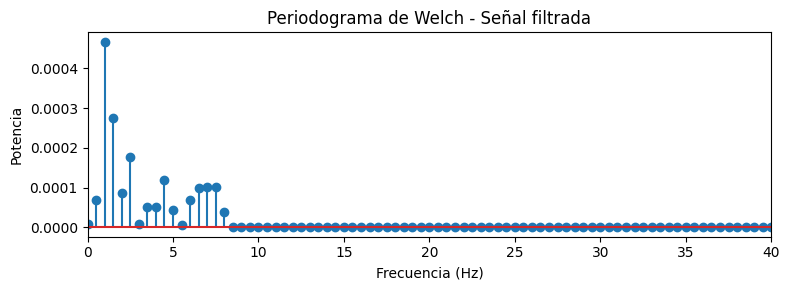

In [ ]:
#filtrado anterior - pasabanda

F1 = np.fft.fft(signal_ecg);
F2 = np.zeros((len(F1)));
F2[0:40] = F1[0:40];
xr = np.fft.ifft(F2);

# periodograma de Welch (se√±al filtrada)
f_filtrada, Pxx_filtrada = welch(np.real(xr), fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8,3))
plt.stem(f_filtrada, Pxx_filtrada)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 40])
plt.title('Periodograma de Welch - Se√±al filtrada')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Se√±al recuperada')

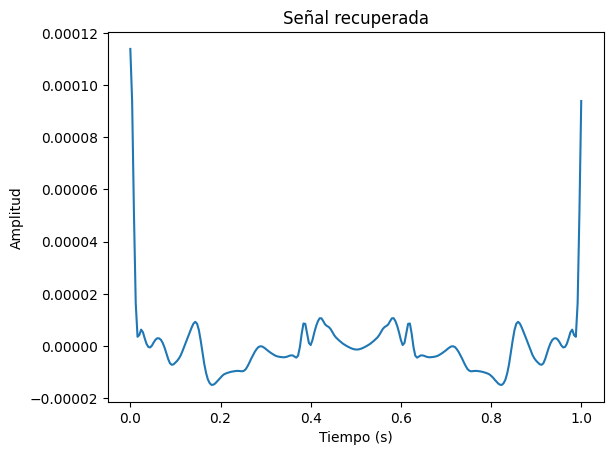

In [ ]:
# Calcular la transformada inversa de Fourier de la se√±al filtrada
signal_recuperada = ifft(Pxx_filtrada)
t= np.arange(0,len(signal_recuperada)/fs,1/fs)
plt.plot(t, signal_recuperada)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Se√±al recuperada')

**6.** Realice un an√°lisis de frecuencia a trav√©s del periodograma de welch de una se√±al de EEG de un paciente Sano y otra de un paciente con Parkinson de alg√∫n canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontr√≥ diferencias, elija un par al azar. Realice un an√°lisis comparativo de las se√±ales seg√∫n lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)

In [ ]:
mat_data_P = loadmat('P049_EP_reposo.mat')
parkinson = mat_data_P['data']
mat_data_C = loadmat('C049_EP_reposo.mat')
control = mat_data_C['data']


In [ ]:
se√±al_p = parkinson[0,:,4].flatten()
se√±al_c = control[0,:,4].flatten()

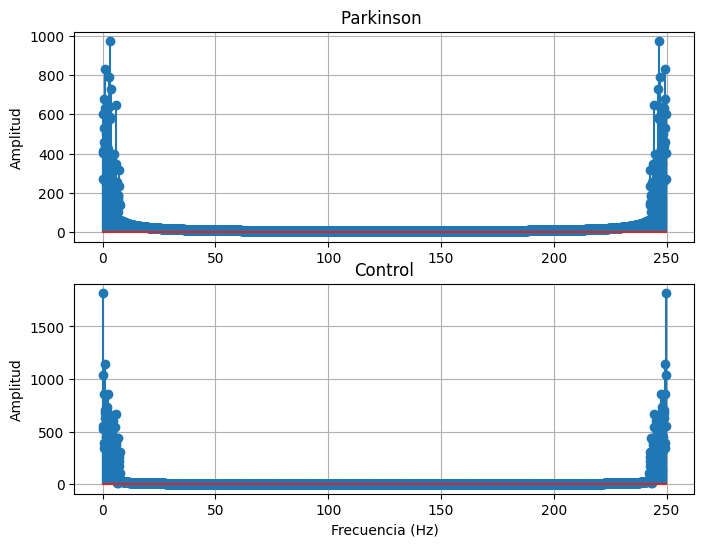

In [ ]:
transformada_P = fft.fft(se√±al_p)
transformada_C = fft.fft(se√±al_c)
Fs= 250
Np = len(transformada_P)
Nc = len(transformada_C)
FP = np.arange(0,Np)*Fs/Np
FC = np.arange(0,Nc)*Fs/Nc


plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.stem(FP,np.abs(transformada_P))
plt.title('Parkinson ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.subplot(2,1,2)
plt.stem(FC,np.abs(transformada_C))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Control')
plt.grid(True)
plt.show()

Esta gr√°fica nos permite evidenciar el rango de frecuencias en la que se encuentra la se√±al de inter√©s. Se encuentra en un intervalo de frecuencias entre 0 y 10 Hz.

**Ancho de ventana:**  Se tiene 2000 datos y una frecuencia de muestreo de 250, como la mayor√≠a de datos se concentran en bajas frecuencias, se escoje una ventana de 500 datos que es lo suficientemente grande para obtener una buena resoluci√≥n en frecuencia.


**Solapamiento:** Al igual que la se√±al anterior se toma un solapamiento del 50%, con el objetivo de no perder mucha informaci√≥n de los datos[4].

Text(0.5, 1.0, 'Periodograma de Welch - Se√±al control')

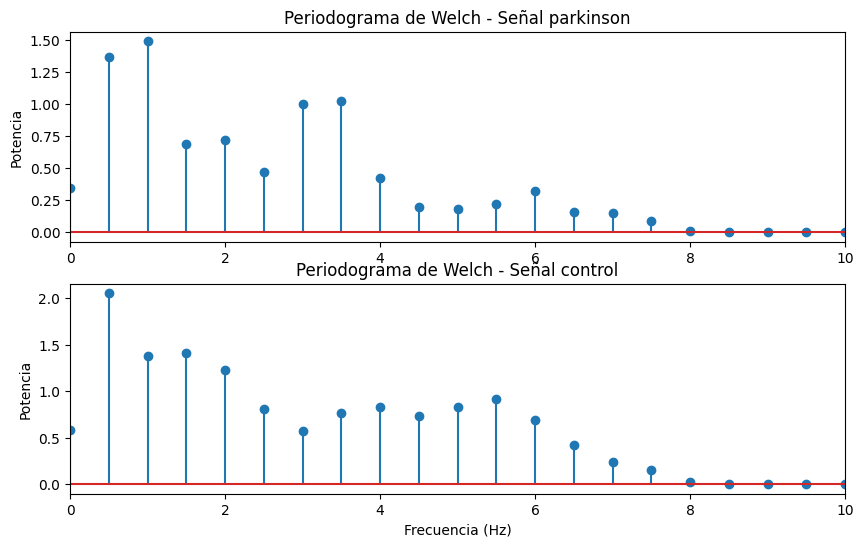

In [ ]:
fs = 250
ancho_ventana = 500
solapamiento = int(ancho_ventana / 2)
window = np.hanning(ancho_ventana)


# periodograma de Welch (se√±al original)
f, Pxx = welch(se√±al_p, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)
fc, Pxxc = welch(se√±al_c, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.stem(f, Pxx)
plt.ylabel('Potencia')
plt.xlim([0, 10])
plt.title('Periodograma de Welch - Se√±al parkinson')

plt.subplot(2,1,2)
plt.stem(fc, Pxxc)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 10])
plt.title('Periodograma de Welch - Se√±al control')

Ambas se√±ales se encuentran de 0 a 8 Hz [5] , donde se encuentran las ondas delta o theta, que indican un estado de reposo y relajaci√≥n.

La se√±al de Parkinson presenta su pico m√°ximo de potencia 1.5 alrededor de 1Hz, con una mayor dispersi√≥n de picos que se extiende hasta cerca de 6 Hz, mientras que la se√±al de control tiene su pico principal en 0.5 Hz con un valor aproximado de 2.2, seguido de una disminuci√≥n r√°pida en la potencia. La se√±al de Parkinson muestra una distribuci√≥n m√°s amplia de energ√≠a a lo largo de varias frecuencias, en contraste con la se√±al de control, que concentra su energ√≠a en las frecuencias m√°s bajas y tiene picos m√°s definidos.

Seg√∫n un estudio, Los pacientes con parkinson presentan una disminuci√≥n para las frecuencias theta y delta en comparaci√≥n con los sujetos sanos, esto podr√≠a justificar su disminuci√≥n de potencia respecto a la se√±al control [6].


##**Conclusiones**

1. Con el an√°lisis frecuencial de se√±ales se pudo descomponer, filtrar y procesar las se√±ales identificando componentes esenciales y ruido. El uso de la Transformada de Fourier y el periodograma de Welch permiti√≥ no solo visualizar las caracter√≠sticas frecuenciales claves, sino tambi√©n aplicar un filtrado eficaz que mejora la calidad de las se√±ales. En esta practica se pudo evidenciar la importancia de estos m√©todos en el procesamiento de las biose√±ales y su potencial en aplicaciones cl√≠nicas para identificar diferencias entre sujetos sanos y patol√≥gicos.

2. El m√©todo de filtrado en el dominio de la frecuencia empleado en este proyecto permite manipular componentes de una se√±al mediante la Transformada de Fourier. Al calcular la transformada de la se√±al original y crear un nuevo arreglo que conserva solo ciertas frecuencias, se eliminan las dem√°s al establecer sus valores en cero. Este proceso mejora la calidad de la se√±al al eliminar ruido y resaltar caracter√≠sticas clave, facilitando as√≠ el an√°lisis y diagn√≥stico de biose√±ales.

3. El periodograma permite hacer un an√°lisis de la energ√≠a presente en las diferentes frecuencias, se pudo evidenciar que la se√±al EEG al poseer ciertos patrones se puede usar un an√°lisis de densidad espectral para evidenciar una patolog√≠a relacionado con la energ√≠a en las frecuencias de las distintas ondas.

##**Referencias**

[1]	¬´frec_Nyquist.pdf¬ª. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: http://carina.fcaglp.unlp.edu.ar/senales/apuntes/frec_Nyquist.pdf

[2]	¬´numpy.fft.ifft ‚Äî Manual de NumPy v2.2.dev0¬ª. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: https://numpy.org/devdocs/reference/generated/numpy.fft.ifft.html

[3]	¬´Electrocardiograf√≠a - Trastornos cardiovasculares¬ª, Manual MSD versi√≥n para profesionales. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: https://www.msdmanuals.com/es/professional/trastornos-cardiovasculares/pruebas-y-procedimientos-cardiovasculares/electrocardiograf√≠a

[4]	¬´Overlap: What, Why and How to use it¬ª. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: https://community.sw.siemens.com/s/article/Overlap-What-Why-and-How-to-use-it

[5]	¬´Tipos de ondas cerebrales: Delta, Theta, Alfa, Beta y Gamma¬ª. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: https://lamenteesmaravillosa.com/tipos-de-ondas-cerebrales/

[6]	¬´Las ondas cerebrales pueden predecir el deterioro cognitivo en la enfermedad de Parkinson | Carver College of Medicine¬ª. Accedido: 24 de octubre de 2024. [En l√≠nea]. Disponible en: https://medicine.uiowa.edu/content/brain-waves-may-predict-cognitive-impairment-parkinsons-disease

